In [1]:
# Importe les librairies
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

<img src='./images/logo-la-poule-qui-chante.png' width=480px />

# Produisez une étude de marché avec Python<br>Partie n°1 : préparation des données

> &#9888; Ce *notebook* est le premier des deux *notebooks* qui vont composer notre étude de marché. Il contient la préparation, le nettoyage et l’analyse exploratoire des données.

Nous sommes en poste chez **La poule qui chante**, une entreprise française d’agroalimentaire qui souhaite se développer à l'international. Cependant, la liste des pays potentiels dans lesquels s'implanter est longue. Pour cela, nous allons réaliser une analyse des groupements de pays que l'on pourra cibler grâce à différentes méthodes de *clustering*, puis nous approfondirons l'étude de marché.

Les données qui vont être utilisées seront toutes issues des [statistiques de la *Food and Agriculture Organization of the United Nations (FAO)*](https://www.fao.org/faostat/fr/#home).
Nous disposons déjà de deux de leurs jeux de données et nous avons récupéré ceux dont nous allons avoir besoin afin d'élargir les critères de l'analyse. Ces critères, que nous appellerons **indicateurs** dans la suite de cette étude, ont été choisis en nous inspirant de l'analyse PESTEL et avec pour objectif de pouvoir caractériser les pays, en voici la synthèse.
|Nom de variable             |Indicateur<sup>[1]</sup>                                        |Information                                      |
|----------------------------|-----------------------------------------------------|-------------------------------------------------|
|`population_milliers_hab`   |Population en milliers d'habitants                   |Taille du marché potentiel                       |
|`evolution_population_%`    |Evolution démographique moyenne entre 2000 et 2017   |Dynamique de la taille marché                    |
|`consommation_volaille_%`  |Ratio de consommation de volaille dans l'alimentation|Intérêt des consommateurs pour la volaille       |
|`tdi_%`                     |Taux de dépendance aux importations pour la volaille |Nécessité des pays à importer                    |
|`taux_croissance_%`         |Taux de croissance du PIB en 2017                    |Dynamique économique du pays                     |
|`revenu_par_habitant_usd`   |Revenu par habitant en US$                           |Pouvoir d'achat des consommateurs                |
|`indice_stabilite_politique`|Indice de stabilité politique                        |Facilité et risques liés aux échanges commerciaux|

*1. Les indicateurs sont donnés pour l'année 2017.*

## Sommaire

* [Préparation des données pour l'analyse](#1)
    * [Importation des *datasets*](#1-1)
    * [Création du *DataFrame* final](#1-2)
    * [Vérification de `df_final`](#1-3)
    * [Exportation de `df_final`](#1-4)
* [Analyse descriptive](#2)
    * [Analyse univariée](#2-1)
    * [Analyse bivariée](#2-2)
* [Exportation de `df_final`](#3)

## Préparation des données pour l'analyse<a id='1'></a>

Nous allons importer chacun des *datasets* nécessairent puis extraire, éventuellement calculer et compiler les indicateurs dans un *DataFrame* final. 

### Importation des *datasets*<a id='1-1'></a>

In [2]:
df_disponibilite = pd.read_csv('./datasets/raw/dispo-alimentaire-2017.csv')
df_disponibilite.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées


In [3]:
df_disponibilite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [4]:
df_macro = pd.read_csv('./datasets/raw/macro-2017.csv')
df_macro.head(3)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,530.149831,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,2,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2017,2017,%,4.865790,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,537.126294,X,Ciffre de sources internationales,NaN


In [5]:
df_macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            844 non-null    object 
 1   Domaine                 844 non-null    object 
 2   Code zone (FAO)         844 non-null    int64  
 3   Zone                    844 non-null    object 
 4   Code Élément            844 non-null    int64  
 5   Élément                 844 non-null    object 
 6   Code Produit            844 non-null    int64  
 7   Produit                 844 non-null    object 
 8   Code année              844 non-null    int64  
 9   Année                   844 non-null    int64  
 10  Unité                   844 non-null    object 
 11  Valeur                  844 non-null    float64
 12  Symbole                 844 non-null    object 
 13  Description du Symbole  844 non-null    object 
 14  Note                    0 non-null      fl

In [6]:
df_population = pd.read_csv('./datasets/raw/population-2000-2018.csv')
df_population.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN


In [7]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [8]:
df_securite = pd.read_csv('./datasets/raw/securite-2017.csv')
df_securite.head(3)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN


In [9]:
df_securite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            196 non-null    object 
 1   Domaine                 196 non-null    object 
 2   Code zone (FAO)         196 non-null    int64  
 3   Zone                    196 non-null    object 
 4   Code Élément            196 non-null    int64  
 5   Élément                 196 non-null    object 
 6   Code Produit            196 non-null    int64  
 7   Produit                 196 non-null    object 
 8   Code année              196 non-null    int64  
 9   Année                   196 non-null    int64  
 10  Unité                   196 non-null    object 
 11  Valeur                  196 non-null    float64
 12  Symbole                 196 non-null    object 
 13  Description du Symbole  196 non-null    object 
 14  Note                    0 non-null      fl

In [10]:
# Crée la liste des DataFrames
dfs = ['df_disponibilite', 'df_macro', 'df_population', 'df_securite']

# Affiche la taille des DataFrames
print(f'DataFrame\t\tDimensions')
for df in dfs:
    print(f'{df:<20}\t{eval(df).shape}')

del df

DataFrame		Dimensions
df_disponibilite    	(176600, 14)
df_macro            	(844, 15)
df_population       	(4411, 15)
df_securite         	(196, 15)


Plusieurs *DataFrames* comportent des valeurs nulles dans la colonne « Note ». Cela n'a pas d'importance car cette colonne ne nous servira pas.

Les noms des variables comprennent des majuscules, des espaces ou des accents. Pour simplifier la lecture et les manipulations, nous créons une fonction qui va convertir les variables selon la convention *snake case*.

In [11]:
def snake_case (df):
    """Renomme les variables d'un DataFrame selon la convention snake case."""
    df.columns = (
        df.columns
        .str.lower()
        .str.replace('\'', '_')
        .str.replace(' - ', '_')
        .str.replace('-', '_')
        .str.replace(' ', '_')
        .str.normalize('NFKD')
        .str.encode('ascii', errors='ignore')
        .str.decode('utf-8')
    )

On applique ensuite cette fonction à nos jeux de données.

In [12]:
# Applique la fonction 'snake_case' aux DataFrames
for df in dfs:
    snake_case(eval(df))

del df

### Création du *DataFrame* final<a id='1-2'></a>

Avant de commencer à extraire les informations qui nous intéressent au sein de chaque *dataset*, nous allons déterminer celui qui contient le plus de pays. C'est par ce dernier que nous commencerons. Si des pays doivent être retirés à cause d'un nombre de données manquantes trop important, nous le ferons par la suite.

In [13]:
# Affiche le nombre de pays de chaque DataFrame
print('DataFrame\t\tNombre de pays')
for df in dfs:
    n_pays = eval(df)['zone'].nunique()
    print(f'{df:<20}\t{n_pays}')

del df, n_pays

DataFrame		Nombre de pays
df_disponibilite    	174
df_macro            	211
df_population       	238
df_securite         	196


C'est le *DataFrame* de la population qui contient le plus de pays. Ce sera notre point de départ avant d'ajouter les autres indicateurs au fûr et à mesure.

#### `df_population`

In [14]:
df_population.head(3)

,code_domaine,domaine,code_zone,zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole,note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN


1. Ajout de la population en 2017.

In [15]:
# Crée le DataFrame final à partir de celui de la population
df_final = df_population.copy()

# Filtre 'annee' et ne conserve que les variables utiles
df_final = df_final.loc[
    df_final['annee'] == 2017, ['code_zone', 'zone', 'valeur']
].reset_index(drop=True)

# Renomme la variable 'valeur'
df_final = df_final.rename(
    columns={'valeur': 'population_milliers_hab'})

df_final.head(3)

,code_zone,zone,population_milliers_hab
0,2,Afghanistan,36296.113
1,202,Afrique du Sud,57009.756
2,3,Albanie,2884.169


2. Ajout de l'évolution démographique : calcul de l'évolution moyenne sur la période 2010-2017.

In [16]:
# Crée un DataFrame temporaire
df_temp = df_population.copy()

# Pivote 'code_zone' et 'zone'
df_temp = df_temp.pivot_table(
    index='annee', columns=['code_zone', 'zone'], values='valeur')

# Complète les valeurs des années manquantes par celles de la ligne précédente
df_temp = df_temp.fillna(method='bfill', axis='rows')

# Calcule l'écart en pourcentage entre deux lignes
df_temp = df_temp.pct_change()

# Calcule la moyenne de chaque colonne
df_temp = (
    (df_temp.mean()*100).round(2)
    .to_frame(name='evolution_population_%')
    .reset_index()
)

# Ajoute la variable à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp[['code_zone', 'evolution_population_%']],
    how='left',
    on='code_zone'
)

del df_temp

df_final.head(3)

,code_zone,zone,population_milliers_hab,evolution_population_%
0,2,Afghanistan,36296.113,3.29
1,202,Afrique du Sud,57009.756,1.40
2,3,Albanie,2884.169,-0.45


#### `df_disponibilite`

In [17]:
df_disponibilite.head(3)

,code_domaine,domaine,code_zone,zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées


1. Part de la consommation de poulet dans l'alimentation.

Nous souhaitons calculer la consommation de poulet dans l'alimentation, hors tous les produits sont présents dans nos données. Nous allons donc chercher le nom de produit qui correspond au poulet.

In [18]:
print(
    df_disponibilite.loc[
        df_disponibilite['produit'].str.contains('poulet|volaille|dinde',
                                                 case=False)
    ]['produit'].unique()
)

['Viande de Volailles']


On peut ensuite calculer et ajouter cette indicateur au *dataset* final.

In [19]:
# Crée un DataFrame temporaire en filtrant 'element'
df_temp = df_disponibilite.loc[df_disponibilite['element'] == 'Nourriture']

# Pivote 'produit'
df_temp = df_temp.pivot_table(
    index='code_zone', columns='produit', values='valeur'
).fillna(0)

# Calcul la part de consommation de volaille
df_temp['consommation_volaille_%'] = (
    df_temp['Viande de Volailles'] / df_temp.sum(axis='columns') * 100
).round(2)

# Réinitialise l'index
df_temp = df_temp.reset_index().rename_axis(None, axis='columns')

# Ajoute la variable à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp[['code_zone', 'consommation_volaille_%']],
    how='left',
    on='code_zone'
)

del df_temp

df_final.head(3)

,code_zone,zone,population_milliers_hab,evolution_population_%,consommation_volaille_%
0,2,Afghanistan,36296.113,3.29,0.42
1,202,Afrique du Sud,57009.756,1.40,6.41
2,3,Albanie,2884.169,-0.45,1.29


2. Ajout du taux de dépendance aux importations (TDI).

Ce dernier se calcul de la manière suivante :

$ TDI = \frac{Importations}{Production + Importations - Exportations} \times 100$

In [20]:
# Crée un DataFrame temporaire en filtrant 'produit'
df_temp = df_disponibilite.loc[
    df_disponibilite['produit'] == 'Viande de Volailles']

# Pivote 'element'
df_temp = (
    df_temp.pivot_table(index='code_zone', columns='element', values='valeur')
).reset_index().rename_axis(None, axis='columns').fillna(0)

# Calcul le taux de dépendance aux importations
df_temp['tdi_%'] = (
    df_temp['Importations - Quantité']
    / (df_temp['Production']
       + df_temp['Importations - Quantité']
       - df_temp['Exportations - Quantité'])
       * 100
).round(2)

# Ajoute la variable à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp[['code_zone', 'tdi_%']],
    how='left',
    on='code_zone'
)

del df_temp

df_final.head(3)

,code_zone,zone,population_milliers_hab,evolution_population_%,consommation_volaille_%,tdi_%
0,2,Afghanistan,36296.113,3.29,0.42,50.88
1,202,Afrique du Sud,57009.756,1.40,6.41,24.27
2,3,Albanie,2884.169,-0.45,1.29,74.51


3. Ajout de la disponibilité de viande de volailles.

In [21]:
# Crée un DataFrame temporaire en filtrant 'element et 'produit'
df_temp = df_disponibilite.loc[
    (df_disponibilite['element']
     == 'Disponibilité alimentaire en quantité (kg/personne/an)')
     & (df_disponibilite['produit'] == 'Viande de Volailles')
]

# Ajoute la variable à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp[['code_zone', 'valeur']],
    how='left',
    on='code_zone'
)

# Renomme les variables
df_final = df_final.rename(
    columns={'valeur': 'disponibilite_kg_p_an'})

del df_temp

df_final.head(3)

,code_zone,zone,population_milliers_hab,evolution_population_%,consommation_volaille_%,tdi_%,disponibilite_kg_p_an
0,2,Afghanistan,36296.113,3.29,0.42,50.88,1.53
1,202,Afrique du Sud,57009.756,1.40,6.41,24.27,35.69
2,3,Albanie,2884.169,-0.45,1.29,74.51,16.36


#### `df_macro`

In [22]:
df_macro.head(3)

,code_domaine,domaine,code_zone_(fao),zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole,note
0,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,530.149831,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,2,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2017,2017,%,4.865790,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,537.126294,X,Ciffre de sources internationales,NaN


Ajout du taux de croissance et du revenu par habitant.

In [23]:
# Crée un DataFrame temporaire en filtrant 'element' et 'produit'
df_temp = df_macro.loc[
    (
        (df_macro['element'] == 'Croissance annuelle US$')
        & (df_macro['produit'] == 'Produit Intérieur Brut')
    )
    | (
        (df_macro['element'] == 'Valeur US $ par habitant')
        & (df_macro['produit'] == 'Revenu national brut')
    )
]

# Pivote 'element'
df_temp =  df_temp.pivot_table(
    index='code_zone_(fao)', columns='element', values='valeur'
).reset_index().rename_axis(None, axis='columns').fillna(0)

# Ajoute les variables à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp[['code_zone_(fao)', 'Croissance annuelle US$',
             'Valeur US $ par habitant']],
    how='left',
    left_on='code_zone',
    right_on='code_zone_(fao)'
).drop(columns='code_zone_(fao)')

# Renomme les variables
df_final = df_final.rename(
    columns={'Croissance annuelle US$': 'taux_croissance_%',
             'Valeur US $ par habitant': 'revenu_par_habitant_usd'}
)

del df_temp

df_final.head(3)

,code_zone,zone,population_milliers_hab,evolution_population_%,consommation_volaille_%,tdi_%,disponibilite_kg_p_an,taux_croissance_%,revenu_par_habitant_usd
0,2,Afghanistan,36296.113,3.29,0.42,50.88,1.53,4.865790,537.126294
1,202,Afrique du Sud,57009.756,1.40,6.41,24.27,35.69,17.703800,6537.504869
2,3,Albanie,2884.169,-0.45,1.29,74.51,16.36,9.765944,4532.791976


#### `df_securite`

In [24]:
df_securite.head(3)

,code_domaine,domaine,code_zone_(fao),zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole,note
0,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN


Ajout de l'indice de stabilité politique.

In [25]:
# Crée un DataFrame temporaire en pivotant 'element'
df_temp = df_securite.pivot_table(
    index='code_zone_(fao)', columns='produit', values='valeur'
).reset_index().rename_axis(None, axis='columns').fillna(0)

# Ajoute la variable à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp[['code_zone_(fao)',
             'Stabilité politique et absence de violence/terrorisme (indice)']],
    how='left',
    left_on='code_zone',
    right_on='code_zone_(fao)'
).drop(columns='code_zone_(fao)')

# Renomme la variable 'valeur'
df_final = df_final.rename(
    columns={'Stabilité politique et absence de violence/terrorisme (indice)':
             'indice_stabilite_politique'}
)

del df_temp

df_final.head(3)

,code_zone,zone,population_milliers_hab,evolution_population_%,consommation_volaille_%,tdi_%,disponibilite_kg_p_an,taux_croissance_%,revenu_par_habitant_usd,indice_stabilite_politique
0,2,Afghanistan,36296.113,3.29,0.42,50.88,1.53,4.865790,537.126294,-2.80
1,202,Afrique du Sud,57009.756,1.40,6.41,24.27,35.69,17.703800,6537.504869,-0.28
2,3,Albanie,2884.169,-0.45,1.29,74.51,16.36,9.765944,4532.791976,0.38


Nos *DataFrames* source ne sont plus nécessaires. On les supprime.

In [26]:
del (dfs, df_disponibilite, df_macro, df_population, df_securite)

### Vérification de `df_final`<a id='1-3'></a>

#### Aperçu des données

In [27]:
df_final.head()

,code_zone,zone,population_milliers_hab,evolution_population_%,consommation_volaille_%,tdi_%,disponibilite_kg_p_an,taux_croissance_%,revenu_par_habitant_usd,indice_stabilite_politique
0,2,Afghanistan,36296.113,3.29,0.42,50.88,1.53,4.865790,537.126294,-2.80
1,202,Afrique du Sud,57009.756,1.40,6.41,24.27,35.69,17.703800,6537.504869,-0.28
2,3,Albanie,2884.169,-0.45,1.29,74.51,16.36,9.765944,4532.791976,0.38
3,4,Algérie,41389.189,1.72,0.80,0.72,6.38,6.287893,4081.775086,-0.92
4,79,Allemagne,82658.409,0.12,2.06,49.24,19.47,6.441277,45734.557505,0.59


In [28]:
print('Dimensions du DataFrame :', df_final.shape)

Dimensions du DataFrame : (236, 10)


On peut supprimer le code des zones/pays qui ne sera plus utile.

In [29]:
df_final = df_final.drop(columns='code_zone')

#### Type des données

In [30]:
df_final.dtypes

zone                           object
population_milliers_hab       float64
evolution_population_%        float64
consommation_volaille_%       float64
tdi_%                         float64
disponibilite_kg_p_an         float64
taux_croissance_%             float64
revenu_par_habitant_usd       float64
indice_stabilite_politique    float64
dtype: object

Le type des données est correct.

#### Doublons

In [31]:
print('Nombre de doublons dans le DataFrame :', df_final.duplicated().sum())

Nombre de doublons dans le DataFrame : 0


#### Valeurs manquantes

In [32]:
df_final.isna().sum()

zone                           0
population_milliers_hab        0
evolution_population_%         0
consommation_volaille_%       62
tdi_%                         66
disponibilite_kg_p_an         64
taux_croissance_%             26
revenu_par_habitant_usd       26
indice_stabilite_politique    40
dtype: int64

On observe une quantité non négligeable de valeurs manquantes. Nous allons sauvergarder la liste des pays avant nettoyage pour pouvoir la comparer avec celle après nettoyage.

In [33]:
# Crée la liste initiale des zones
liste_initiale_zones = set(df_final['zone'].unique())

Nous choisissons de supprimer les pays pour lesquels nous n'avons pas d'informations sur la consommation, le taux de dépendance aux importations et la disponibilité. En effet, ces critères sont trop importants pour être remplacés par la valeur moyenne ou médiane de chaque variable. Il sera très difficile de trouver ces informations si même la FAO ne les met pas à disposition.

In [34]:
# Conserve les pays ayant des informations de disponibilité
df_final = df_final.loc[
    (~df_final['consommation_volaille_%'].isna())
    & (~df_final['tdi_%'].isna())
    & (~df_final['disponibilite_kg_p_an'].isna())
]

Voyons les valeurs manquantes restantes.

In [35]:
df_final[df_final.isna().any(axis='columns')]

,zone,population_milliers_hab,evolution_population_%,consommation_volaille_%,tdi_%,disponibilite_kg_p_an,taux_croissance_%,revenu_par_habitant_usd,indice_stabilite_politique
43,"Chine, continentale",1421021.791,0.56,1.27,2.50,12.33,9.589146,8717.698270,NaN
44,"Chine, Taiwan Province de",23674.546,0.43,5.18,20.00,33.17,NaN,NaN,NaN
155,Nouvelle-Calédonie,277.150,1.42,7.01,90.00,38.71,5.223314,32263.340715,NaN
170,Polynésie française,276.102,0.80,6.99,93.75,47.40,6.190222,19743.958991,NaN


Après quelques recherches, on trouve l'indice de stabilité politique de la Chine. Nous allons donc directement l'imputer.

In [36]:
# Impute 'indice_stabilite_politique'
df_final.loc[(df_final['zone'] == 'Chine, continentale'),
    'indice_stabilite_politique'] = -0.23

Pour Taiwan, on complète la croissance et le revenu par les valeurs trouvées dans une note de synthèse du gouvernement français. En ce qui concerne l'indice de stabilité, nous allons imputer la valeur médiane du jeu de données.

In [37]:
# Impute 'taux_croissance_%'
df_final.loc[df_final['zone'] == 'Chine, Taiwan Province de',
             'taux_croissance_%'] = 3.08

# Impute 'revenu_par_habitant_usd'
df_final.loc[df_final['zone'] == 'Chine, Taiwan Province de',
             'revenu_par_habitant_usd'] = 22698

# Impute 'indice_stabilite_politique' avec la médiane
df_final.loc[
    df_final['zone'] == 'Chine, Taiwan Province de',
    'indice_stabilite_politique'
] = df_final['indice_stabilite_politique'].median()

Enfin, on décide d'impute la valeur de l'indice de stabilité politique de la France à la Nouvelle-Calédonie et à la Polynésie française même si cela n'est pas tout à fait exact.

In [38]:
# Récupère l'indice de stabilite de la France
indice_france = df_final.loc[
    df_final['zone'] == 'France', 'indice_stabilite_politique'].values

# Impute la valeur à la Nouvelle-Calédonie et à la Polynésie française
df_final.loc[(df_final['zone'] == 'Nouvelle-Calédonie'),
    'indice_stabilite_politique'] = indice_france

df_final.loc[df_final['zone'] == 'Polynésie française',
    'indice_stabilite_politique'] = indice_france

del indice_france

Le traitement des valeurs manquantes étant terminé, nous pouvons vérifier la liste des pays supprimés.

In [39]:
# Crée la liste des zones après traitement
liste_finales_zones = set(df_final['zone'].unique())

# Crée la liste des zones supprimées
liste_zones_supprimees = liste_initiale_zones - liste_finales_zones

# Affiche la liste des zones supprimées
print(liste_zones_supprimees)

{'Saint-Pierre-et-Miquelon', 'Seychelles', 'Îles Féroé', 'Bonaire, Saint-Eustache et Saba', 'Palaos', 'Guyane française', 'Tuvalu', 'Micronésie (États fédérés de)', 'Libye', 'Papouasie-Nouvelle-Guinée', 'Mayotte', 'Sint Maarten  (partie néerlandaise)', 'Samoa américaines', 'Îles Vierges américaines', 'Antilles néerlandaises (ex)', 'Îles Mariannes du Nord', 'Porto Rico', 'Saint-Siège', 'Îles Wallis-et-Futuna', 'Réunion', 'Andorre', 'Martinique', 'République arabe syrienne', 'Îles Turques-et-Caïques', 'Palestine', 'Tonga', 'Îles Vierges britanniques', 'Guam', 'République démocratique du Congo', 'Singapour', 'Sahara occidental', 'Saint-Barthélemy', 'Érythrée', 'Tokélaou', 'Monaco', 'Aruba', 'Montserrat', 'Qatar', 'Guinée équatoriale', 'Îles Marshall', 'Saint-Marin', 'Anguilla', 'Curaçao', 'République démocratique populaire lao', 'Sainte-Hélène, Ascension et Tristan da Cunha', 'Comores', 'Soudan du Sud', 'Bermudes', 'Liechtenstein', 'Burundi', 'Groenland', 'Gibraltar', 'Nioué', 'Bahreïn', 

Les pays supprimés sont essentiellement des îles ou des régions appartenant à d'autres pays et des quelques pays d'Afrique. On considère que cela aura peu d'impact sur les résultats de notre analyse.

Pour finaliser la préparation de notre jeu de données final, nous allons réinitialiser l'index et renommer la variable « zone » en « pays ».

In [40]:
# RAZ de l'index de 'df_final'
df_final = df_final.reset_index(drop=True)

# Renomme la variable 'zone'
df_final = df_final.rename(columns={'zone': 'pays'})

In [41]:
del liste_initiale_zones, liste_finales_zones, liste_zones_supprimees

## Analyse descriptive<a id='2'></a>

### Analyse univariée<a id='2-1'></a>

In [42]:
df_final.head()

,pays,population_milliers_hab,evolution_population_%,consommation_volaille_%,tdi_%,disponibilite_kg_p_an,taux_croissance_%,revenu_par_habitant_usd,indice_stabilite_politique
0,Afghanistan,36296.113,3.29,0.42,50.88,1.53,4.865790,537.126294,-2.80
1,Afrique du Sud,57009.756,1.40,6.41,24.27,35.69,17.703800,6537.504869,-0.28
2,Albanie,2884.169,-0.45,1.29,74.51,16.36,9.765944,4532.791976,0.38
3,Algérie,41389.189,1.72,0.80,0.72,6.38,6.287893,4081.775086,-0.92
4,Allemagne,82658.409,0.12,2.06,49.24,19.47,6.441277,45734.557505,0.59


In [43]:
# Affiche le nombre de pays
print('Nombre de pays dans le jeu de données :', df_final['pays'].nunique())

# Affiche le nombre d'indicateurs
print('Nombre d\'indicateurs :', (len(df_final.columns)-1))

Nombre de pays dans le jeu de données : 170
Nombre d'indicateurs : 8


Nous pouvons créer une liste de nos indicateurs qui nous permettra nous aidera par la suite à tracer nos représentations graphiques

In [44]:
# Crée la liste des indicateurs
indicateurs = (list(df_final.columns))
indicateurs.remove('pays')

Puis on affiche une description de nos données.

In [45]:
# Affiche la description des variables quantitatives
df_final.describe().T.style.format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
population_milliers_hab,170.00,43116.88,153939.48,52.05,2855.10,9757.83,29713.20,1421021.79
evolution_population_%,170.00,1.37,1.23,-1.23,0.49,1.27,2.24,6.58
consommation_volaille_%,170.00,2.98,2.50,0.04,1.17,2.21,4.18,13.04
tdi_%,170.00,41.55,47.27,0.00,4.00,24.25,76.16,338.43
disponibilite_kg_p_an,170.00,20.38,15.88,0.13,6.61,18.23,30.21,72.31
taux_croissance_%,170.00,7.78,6.60,-27.80,5.21,7.47,10.30,36.13
revenu_par_habitant_usd,170.00,13728.00,18172.76,435.87,1904.40,5951.13,17129.74,81118.45
indice_stabilite_politique,170.00,-0.07,0.90,-2.94,-0.63,-0.02,0.65,1.60


#### Distribution et dispersion des indicateurs

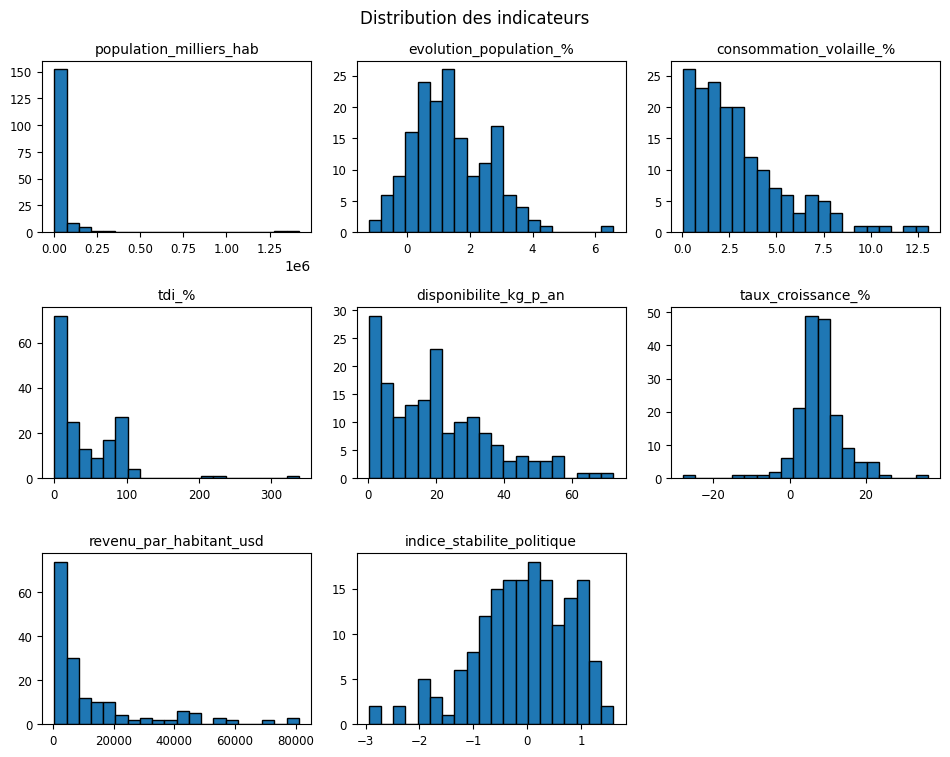

In [126]:
# Affiche la distribution des indicateurs

# Initialise le graphique
fig, axs = plt.subplots(3, 3, figsize=(9.6, 7.68))

# Trace l'histogramme pour chaque variable
for i, indicateur in enumerate(indicateurs):
    r = i // 3
    c = i % 3
    axs[r, c].hist(indicateur, data=df_final, edgecolor='k', bins=20)
    axs[r, c].set_title(indicateur, size=10)
    axs[r, c].tick_params(axis='both', which='both', labelsize=8.5)

# Supprime les graphiques vides
[fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]

fig.suptitle('Distribution des indicateurs')

plt.tight_layout()

plt.show()

del fig, axs, i, r, c

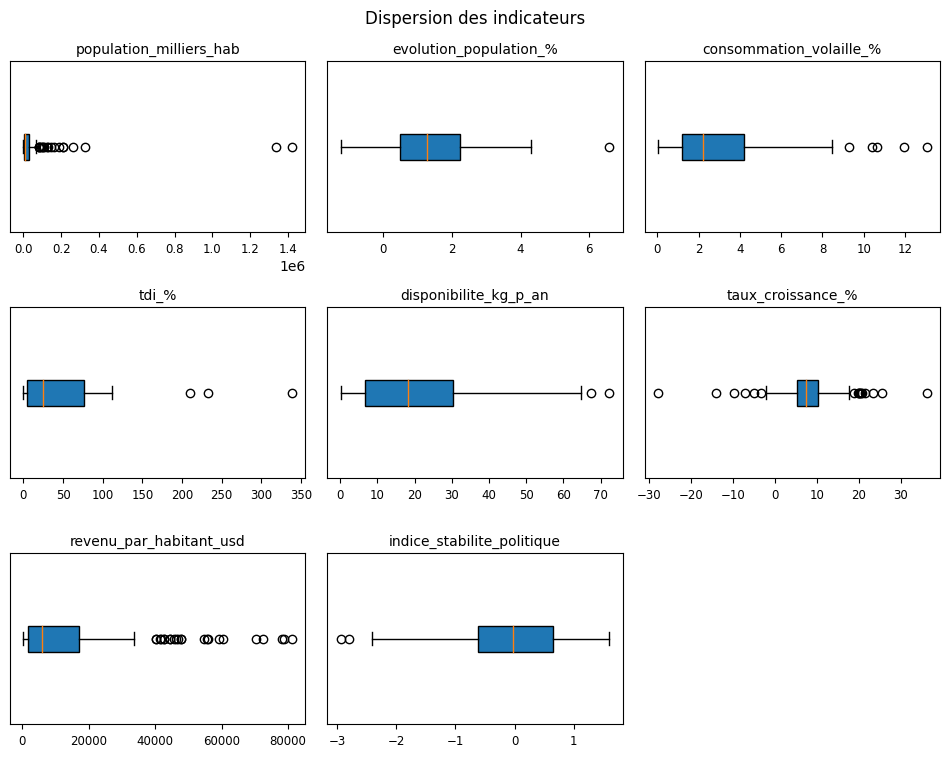

In [47]:
# Affiche la distribution des indicateurs

# Initialise le graphique
fig, axs = plt.subplots(3, 3, figsize=(9.6, 7.68))

# Trace le boxplot pour chaque variable
for i, indicateur in enumerate(indicateurs):
    r = i // 3
    c = i % 3
    axs[r, c].boxplot(indicateur, data=df_final, patch_artist=True, vert=False)
    axs[r, c].set_title(indicateur, size=10)
    axs[r, c].yaxis.set_major_locator(plt.NullLocator())
    axs[r, c].tick_params(axis='x', which='both', labelsize=8.5)

# Supprime les graphiques vides
[fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]

fig.suptitle('Dispersion des indicateurs')

plt.tight_layout()

plt.show()

del fig, axs, i, indicateur, r, c

Le tableau et les deux graphiques ci-dessus nous indique que nos données ne sont globalement pas centrées mais plutôt étirées dans un sens ou dans l'autre. La valeur de la population est même très concentrée. De plus, la plupart de nos indicateurs ont quelques valeurs aberrantes. Cela peut compliquer le *clustering* à venir et il pourrait être utile de traiter ces *outliers*. Nous allons les afficher un par un en créant une fonction dédiée.

In [111]:
def display_outliers_tab(indicateur, position=['upper', 'lower']):
    """
    Affiche les pays outliers pour un indicateur donné de df_final.
    Paramètres :
    - indicateur : le nom de l'indicateur à afficher.
    - position : la position des outlier à afficher.
    """

    # Calcul les bornes max/min
    Q1 = df_final[indicateur].quantile(0.25)
    Q3 = df_final[indicateur].quantile(0.75)
    IQR = Q3 - Q1
    max_boxplot = 1.5 * IQR + Q3
    min_boxplot = Q1 - 1.5 * IQR

    # Filtre les outliers
    if position == 'upper':
        return df_final.loc[
            df_final[indicateur] >= max_boxplot, ['pays', indicateur]
        ].sort_values(by=indicateur, ascending=False)
    elif position == 'lower':
        return df_final.loc[
            df_final[indicateur] <= min_boxplot, ['pays', indicateur]
        ].sort_values(by=indicateur)   


On peut ensuite afficher les valeurs aberrantes de chaque indicateur.

In [113]:
display_outliers_tab('population_milliers_hab', 'upper')

,pays,population_milliers_hab
33,"Chine, continentale",1421021.791
72,Inde,1338676.785
52,États-Unis d'Amérique,325084.756
73,Indonésie,264650.963
119,Pakistan,207906.209
23,Brésil,207833.823
113,Nigéria,190873.244
14,Bangladesh,159685.424
54,Fédération de Russie,145530.082
81,Japon,127502.725


In [117]:
display_outliers_tab('evolution_population_%', 'upper')

,pays,evolution_population_%
47,Émirats arabes unis,6.58


In [118]:
display_outliers_tab('consommation_volaille_%', 'upper')

,pays,consommation_volaille_%
138,Saint-Kitts-et-Nevis,13.04
139,Saint-Vincent-et-les Grenadines,11.94
158,Trinité-et-Tobago,10.65
137,Sainte-Lucie,10.42
63,Grenade,9.26


In [119]:
display_outliers_tab('tdi_%', 'upper')

,pays,tdi_%
31,Chine - RAS de Hong-Kong,338.43
17,Belgique,233.10
122,Pays-Bas,209.66


In [120]:
display_outliers_tab('disponibilite_kg_p_an', 'upper')

,pays,disponibilite_kg_p_an
139,Saint-Vincent-et-les Grenadines,72.31
78,Israël,67.39


In [121]:
display_outliers_tab('taux_croissance_%', 'upper')

,pays,taux_croissance_%
147,Soudan,36.133401
97,Malawi,25.544370
54,Fédération de Russie,23.293875
83,Kazakhstan,21.509200
5,Angola,20.766647
168,Zambie,20.582767
109,Namibie,20.196593
162,Ukraine,20.067978
65,Guinée,20.000796
130,République de Moldova,19.801505


In [122]:
display_outliers_tab('taux_croissance_%', 'lower')

,pays,taux_croissance_%
45,Égypte,-27.795932
165,Venezuela (République bolivarienne du),-14.069328
44,Dominique,-9.636719
113,Nigéria,-7.143094
159,Tunisie,-4.951605
144,Sierra Leone,-3.201634


In [123]:
display_outliers_tab('revenu_par_habitant_usd', 'upper')

,pays,revenu_par_habitant_usd
150,Suisse,81118.449926
93,Luxembourg,78873.811060
114,Norvège,78263.704686
77,Islande,72312.699778
32,Chine - RAS de Macao,70300.937271
52,États-Unis d'Amérique,60297.391594
42,Danemark,59155.352620
76,Irlande,56058.607933
10,Australie,55633.452640
149,Suède,54722.389207


In [124]:
display_outliers_tab('indice_stabilite_politique', 'lower')

,pays,indice_stabilite_politique
167,Yémen,-2.94
0,Afghanistan,-2.80


Tous les *outliers* ne semblent pas être des erreurs. Nous faisons donc le choix de les conserver afin de ne pas perdre d'informations et fausser les résultats des groupements.

### Analyse bivariée<a id='2-2'></a>

#### Matrice de corrélation

On commence par calculer les corrélations entres nos variables.

In [127]:
correlation_matrix = df_final.corr(numeric_only=True)
correlation_matrix.style.format('{:.2f}')

,population_milliers_hab,evolution_population_%,consommation_volaille_%,tdi_%,disponibilite_kg_p_an,taux_croissance_%,revenu_par_habitant_usd,indice_stabilite_politique
population_milliers_hab,1.00,-0.03,-0.11,-0.19,-0.09,0.05,-0.04,-0.15
evolution_population_%,-0.03,1.00,-0.13,0.02,-0.27,-0.06,-0.19,-0.36
consommation_volaille_%,-0.11,-0.13,1.00,0.18,0.93,-0.13,0.23,0.34
tdi_%,-0.19,0.02,0.18,1.00,0.17,-0.04,0.22,0.32
disponibilite_kg_p_an,-0.09,-0.27,0.93,0.17,1.00,-0.10,0.39,0.44
taux_croissance_%,0.05,-0.06,-0.13,-0.04,-0.10,1.00,-0.04,0.01
revenu_par_habitant_usd,-0.04,-0.19,0.23,0.22,0.39,-0.04,1.00,0.56
indice_stabilite_politique,-0.15,-0.36,0.34,0.32,0.44,0.01,0.56,1.00


Puis on affiche cette matrice sous forme graphique.

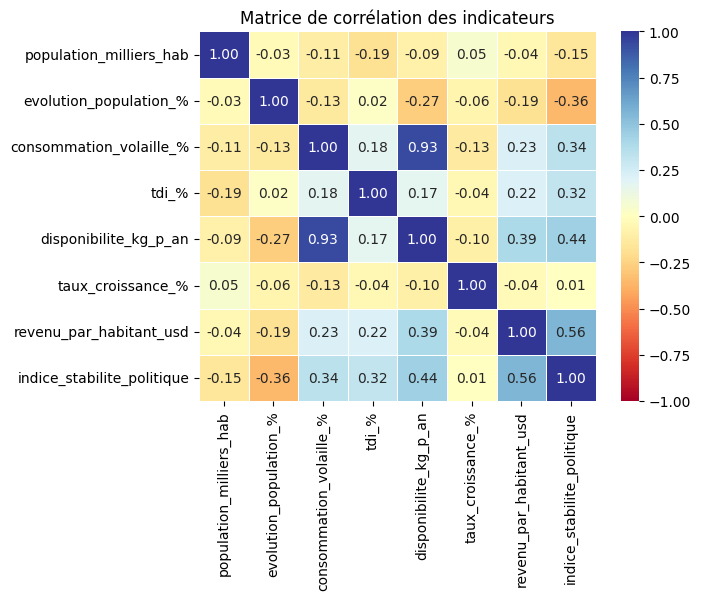

In [128]:
# Initialise le graphique
fig, ax = plt.subplots(figsize=(6.4, 4.8))

# Trace la matrice
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', vmin=-1, vmax=1,
annot_kws=None, linewidths=0.6, cmap='RdYlBu', ax=ax)

ax.set_title('Matrice de corrélation des indicateurs')

plt.show()

del fig, ax

On constate que :
* la consommation et la disponibilté de volaille sont très corrélés ;
* l'indice de stablilité politique est l'indicateur le plus corrélé avec les autres.

#### Relations entre variables quantitatives

Traçons les relations entre les variables ayant les valeurs de corrélations les plus significatives. Afin d'automatiser la sélection des variables, nous créons une fonction qui permet de ne tracer que les paires de variables qui nous intéressent.

In [144]:
def filtered_pairplot(df, corr_value, ncols=3):
    """
    Trace les paires de variables en les filtrant à partir des coefficients de
    corrélation calculés dans la matrice de corrélation.
    Paramètres :
    - df : DataFrame source.
    - corr_value : valeur de corrélation minimale pour tracer la paire.
    - ncols : nombre de colonnes du graphique.
    """

    # Calcule la matrice de corrélation et pivote les colonnes
    df_temp = df.corr(numeric_only=True).unstack().reset_index()

    # Renomme les colonnes
    df_temp = df_temp.rename(
        columns={'level_0': 'var_0', 'level_1': 'var_1', 0: 'value'})
    
    # Sélectionne les lignes ayant une valeur absolue supérieure à 'corr_value'
    df_temp = df_temp.loc[(np.abs(df_temp['value']) >= corr_value)
                          & (np.abs(df_temp['value']) != 1)]
    
    # Supprime les doublons
    df_temp = df_temp.drop_duplicates(subset='value')

    # Détermine le nombre de lignes de graphiques à créer
    nrows = np.ceil(len(df_temp) / ncols).astype(int)

    # Initialise le graphique
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                            figsize=((ncols*3), (2*nrows+2)))
    
    # Boucle sur les lignes du DataFrame
    for i, row in enumerate(df_temp.itertuples()):

        # Calcul la position du graphique
        r = i // ncols
        c = i % ncols

        # Trace les graphiques
        axs[r, c].scatter(df[row.var_0], df[row.var_1], edgecolors='w',
                          alpha=0.8)
        axs[r, c].set_xlabel(row.var_0, size=9)
        axs[r, c].set_ylabel(row.var_1, size=9)
        axs[r, c].tick_params(axis='both', which='both', labelsize=8.5)
    
    # Supprime les graphiques vides
    [fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]

    fig.suptitle(
        f'Paires de variables avec coefficient de corrélation ≤ -{corr_value}' 
        f' et ≥ +{corr_value}'
        , y=1.02)
      
    fig.tight_layout()

    plt.show()

On peut ensuite tracer nos graphiques.

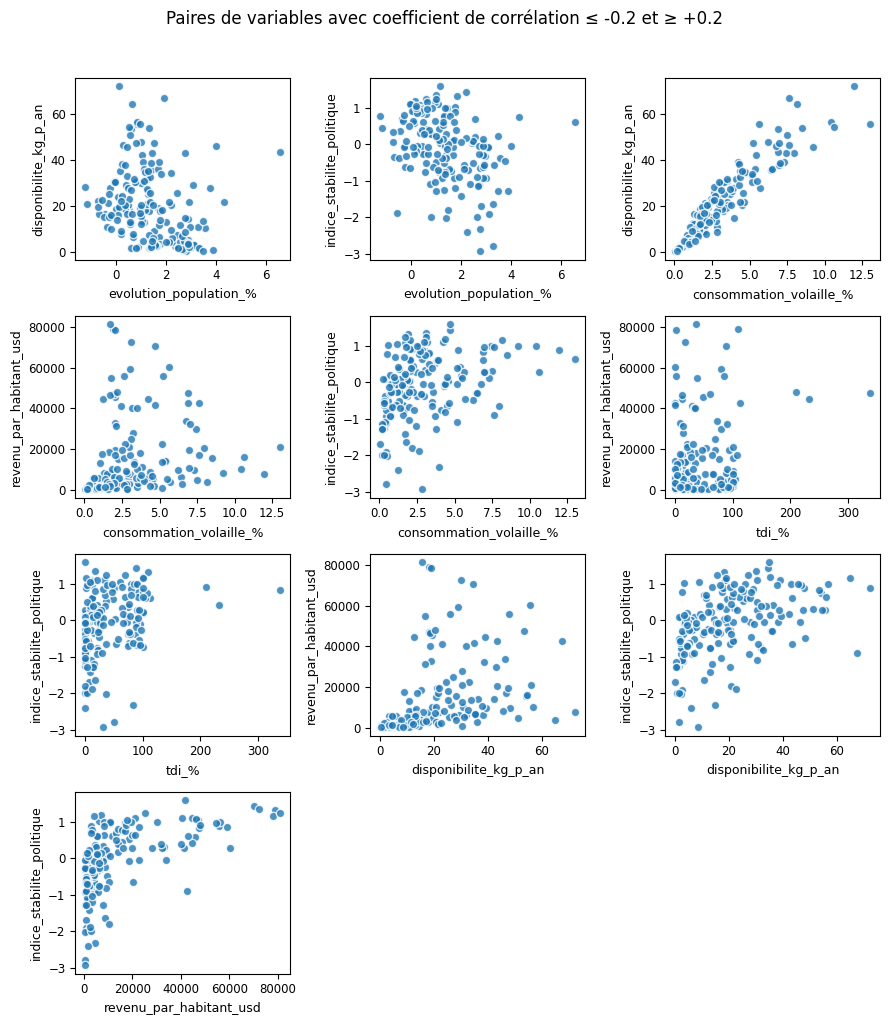

In [145]:
filtered_pairplot(df_final, 0.2)

### Exportation de `df_final`<a id='3'></a>

In [146]:
df_final.to_csv('./datasets/indicateurs-pays-2017.csv', index=False)